### To do PCA:

1.   Center the datapoint
2.   Find covariance matrix
3.   Do eigendecomposition of covariance matrix to find eigen vector and eigen value



*   Eigenvectors : Eigenvectors are those kind of special vectors which in linear transformation done by a matrix doesn't change the direction of vector, only their magnitude get scaled by their factor(the factor is called eigenvalues).


*   Eigenvalues : Eigenvalues is the scalar that streches or shrinks the eigenvector.  



*   Why Eigenvector and Eigenvalues need while doing pca ?
    - Because after the eigendecompostion of covariance matrix the largest eigenvector is find out that points to the direction of maximum variance which is also called principle component.
    - The eigenvalues tell us how much variance each principal component captures.










In [13]:
import numpy as np
import pandas as pd

In [14]:
import numpy as np
import pandas as pd

np.random.seed(23)

mu_vec1 = np.array([0,0,0])
cov_mat1 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 20)

df = pd.DataFrame(class1_sample,columns=['feature1','feature2','feature3'])
df['target'] = 1

mu_vec2 = np.array([1,1,1])
cov_mat2 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 20)

df1 = pd.DataFrame(class2_sample,columns=['feature1','feature2','feature3'])

df1['target'] = 0

# Used pd.concat instead of df.append
df = pd.concat([df, df1], ignore_index=True)



In [15]:
df.sample(5)

,feature1,feature2,feature3,target
2,-0.367548,-1.137460,-1.322148,1
34,0.177061,-0.598109,1.226512,0
14,0.420623,0.411620,-0.071324,1
11,1.968435,-0.547788,-0.679418,1
12,-2.506230,0.146960,0.606195,1


In [16]:
df.isnull().sum()

,0
feature1,0
feature2,0
feature3,0
target,0


In [18]:
import plotly.express as px
fig = px.scatter_3d(df, x=df['feature1'], y=df['feature2'], z=df['feature3'],color=df['target'].astype('str'))
fig.update_traces(marker=dict(size=12,line=dict(width=2,color='DarkSlateGrey')),selector=dict(mode='markers'))

fig.show()

In [20]:
# First Step is to mean the dataset using standard scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df.iloc[:, 0:3]= scaler.fit_transform(df.iloc[:, 0:3])

In [21]:
# Finding Covariance matrix of three features
cov_mat=np.cov([df['feature1'],df['feature2'],df['feature3']])
cov_mat

array([[1.02564103, 0.20478114, 0.080118  ],
       [0.20478114, 1.02564103, 0.19838882],
       [0.080118  , 0.19838882, 1.02564103]])

In [24]:
# Decomposition of covariance matrix
eigen_values, eigen_vectors=np.linalg.eig(cov_mat)

In [25]:
eigen_values

array([1.3536065 , 0.94557084, 0.77774573])

In [26]:
eigen_vectors

array([[-0.53875915, -0.69363291,  0.47813384],
       [-0.65608325, -0.01057596, -0.75461442],
       [-0.52848211,  0.72025103,  0.44938304]])

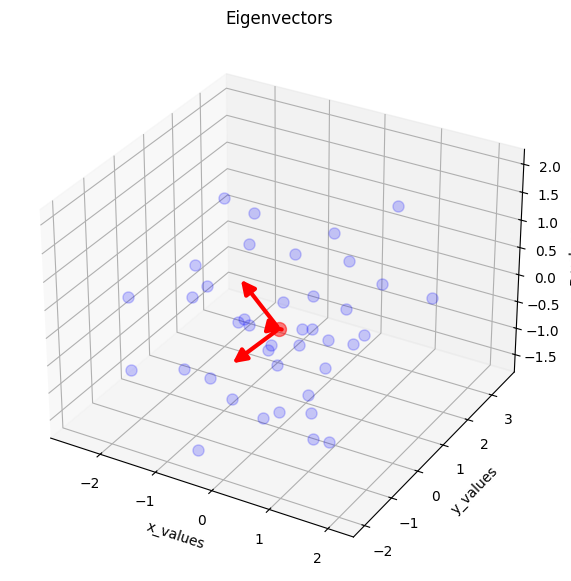

In [34]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from matplotlib.patches import FancyArrowPatch
import numpy as np


class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0, 0), (0, 0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, self.axes.M)
        self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))
        FancyArrowPatch.draw(self, renderer)

    def do_3d_projection(self, renderer=None):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, self.axes.M)
        self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))
        return np.min(zs), np.max(zs)


fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')

ax.plot(df['feature1'], df['feature2'], df['feature3'], 'o', markersize=8, color='blue', alpha=0.2)
ax.plot([df['feature1'].mean()], [df['feature2'].mean()], [df['feature3'].mean()], 'o', markersize=10, color='red', alpha=0.5)
for v in eigen_vectors.T:
    a = Arrow3D([df['feature1'].mean(), v[0]], [df['feature2'].mean(), v[1]], [df['feature3'].mean(), v[2]],
                mutation_scale=20, lw=3, arrowstyle="-|>", color="r")
    ax.add_artist(a)
ax.set_xlabel('x_values')
ax.set_ylabel('y_values')
ax.set_zlabel('z_values')

plt.title('Eigenvectors')

plt.show()

In [31]:
principle_component=eigen_vectors[:,0:2]

In [32]:
principle_component

array([[-0.53875915, -0.69363291],
       [-0.65608325, -0.01057596],
       [-0.52848211,  0.72025103]])

In [37]:
pc_applied_df=np.dot(df.iloc[:, 0:3],principle_component)

In [38]:
pc_applied_df

array([[ 0.83391803, -1.05219369],
       [ 0.40498418, -1.40302147],
       [ 2.3028766 , -0.75759296],
       [-0.12571125, -0.80232364],
       [ 1.09822317, -1.01172173],
       [ 0.47794268,  1.16802366],
       [ 2.35091642,  0.84182778],
       [-0.40377654, -0.28039329],
       [ 1.34932831, -0.37788334],
       [ 0.66552149, -1.69999342],
       [-0.48904607, -0.55672125],
       [ 0.53426153, -1.77377341],
       [ 1.61043442,  1.74781887],
       [ 0.37053038,  0.45116955],
       [ 0.38027543, -0.45944328],
       [ 0.21635772, -0.19743135],
       [ 1.40337141,  0.02926122],
       [ 0.3316885 , -0.19219241],
       [ 1.69405546,  0.45469391],
       [ 0.81792962,  1.20379693],
       [-0.69440524,  0.16301621],
       [-0.90855273,  0.81698089],
       [-2.57205029, -1.26553038],
       [-1.65476386,  0.69147326],
       [-1.71761516,  0.10585491],
       [-0.33332921,  0.28205947],
       [-0.27486612, -0.18490592],
       [-2.71015281,  0.46266549],
       [-0.74982029,

In [39]:
df_new=pd.DataFrame(data=pc_applied_df,columns=['pc1','pc2'])

In [40]:
df_new['target']=df['target'].values

In [41]:
df_new

,pc1,pc2,target
0,0.833918,-1.052194,1
1,0.404984,-1.403021,1
2,2.302877,-0.757593,1
3,-0.125711,-0.802324,1
4,1.098223,-1.011722,1
5,0.477943,1.168024,1
6,2.350916,0.841828,1
7,-0.403777,-0.280393,1
8,1.349328,-0.377883,1
9,0.665521,-1.699993,1


In [42]:
df_new['target'] = df_new['target'].astype('str')
fig = px.scatter(x=df_new['pc1'],
                 y=df_new['pc2'],
                 color=df_new['target'],
                 color_discrete_sequence=px.colors.qualitative.G10
                )

fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.show()

